#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [1]:
# Import Pandas and Numpy to deal with DataFrames and NaN
import pandas as pd
import numpy as np

# Import MatPlotLib and Seaborn to help visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Import os for file reader
import os

In [2]:
# Get current working directory
current_directory = os.getcwd()
print(current_directory)

/Users/brandonrose/Midterm_Project


In [3]:
# Pull the data from csv by concatenating current working directory with
# '/data/flights_10000.csv'
data = pd.read_csv(current_directory +'/data/flights_10000.csv')
data.drop(['Unnamed: 0', 'no_name'], axis=1, inplace=True)

In [4]:
#Define a taxi dataframe that only has relevant information
#Drop NaN to remove cancellation flights
df_taxi = data.loc[:,['tail_num', 'dep_time', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'arr_time']].dropna().reset_index()

In [5]:
# Import function that determines time of day based on arr_time and dep_time columns
from src.modules.data_preprocessing import time_of_day

In [6]:
#New column to categorize Morning, Afternoon, Evening, Nite
df_taxi['dep_time_of_day'] = df_taxi.apply(lambda df: time_of_day(df, method='dep'), axis=1)
df_taxi['arr_time_of_day'] = df_taxi.apply(lambda df: time_of_day(df, method='arr'), axis=1)

In [7]:
df_taxi['dep_time_of_day'].value_counts()

Morning      4026
Afternoon    2806
Evening      2188
Night         813
Name: dep_time_of_day, dtype: int64

In [8]:
#Add a counter column to return a count of flights in our groupby 
df_taxi['counter'] = 1

In [9]:
#Group departures based on their time_of_day value
departure_group = df_taxi.groupby('dep_time_of_day')[['taxi_out', 'counter']].sum().reset_index()

In [10]:
# Sort this based on taxi_out times
departure_group.sort_values('taxi_out', ascending=False)

,dep_time_of_day,taxi_out,counter
2,Morning,70834.0,4026
0,Afternoon,47708.0,2806
1,Evening,39977.0,2188
3,Night,13536.0,813


In [11]:
#Repeat these for arrival group
arrival_group = df_taxi.groupby('arr_time_of_day')[['taxi_in', 'counter']].sum().reset_index()
arrival_group.sort_values('taxi_in', ascending=False)

,arr_time_of_day,taxi_in,counter
2,Morning,23260.0,2892
0,Afternoon,20960.0,2867
1,Evening,17708.0,2239


#### Visualize the different taxi time weights with pie charts

In [13]:
#assign our arrivals and departures data to new variables
#---ARRIVALS---
data1 = arrival_group['taxi_in']
labels1 = arrival_group['arr_time_of_day'].unique()
#---DEPARTURES---
data2 = departure_group['taxi_out']
labels2 = departure_group['dep_time_of_day'].unique()

TypeError: pie() got an unexpected keyword argument 'ax'

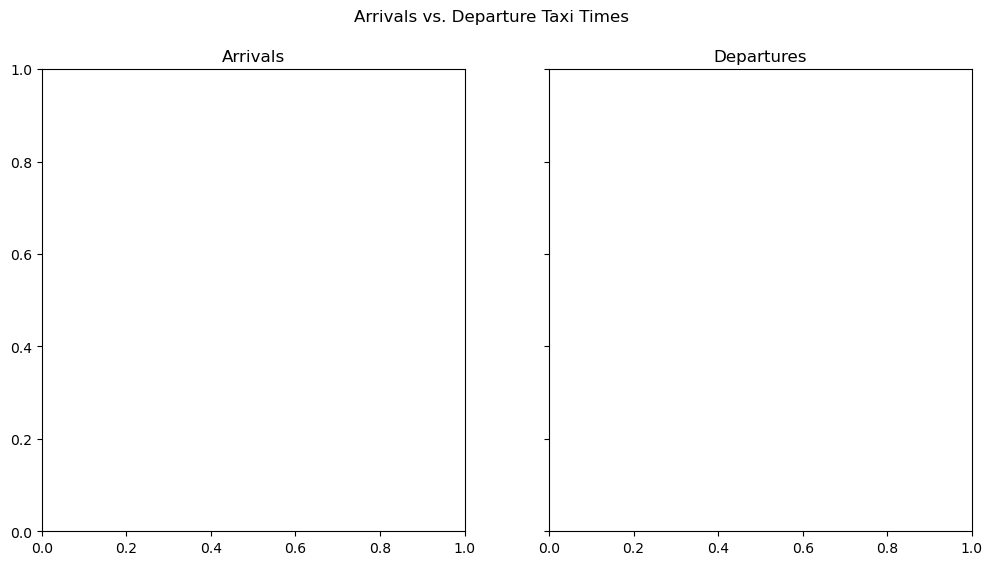

In [21]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:4]

# Plot the new data in side by side pie charts
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,6))
fig.suptitle('Arrivals vs. Departure Taxi Times')
axes[0].set_title('Arrivals')
axes[1].set_title('Departures')

# Arrival Chart
# plt.pie(data1, ax=axes[0], labels = labels1, colors = colors, autopct='%.0f%%')

# Departure Chart
# plt.pie(data2, labels = labels2, colors = colors, autopct='%.0f%%')

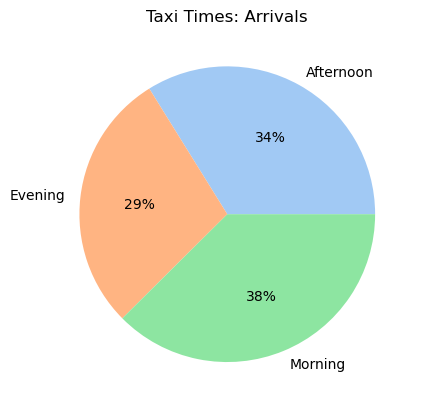

In [23]:
# ARRIVAL TAXI
plt.title("Taxi Times: Arrivals")
plt.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
plt.show()

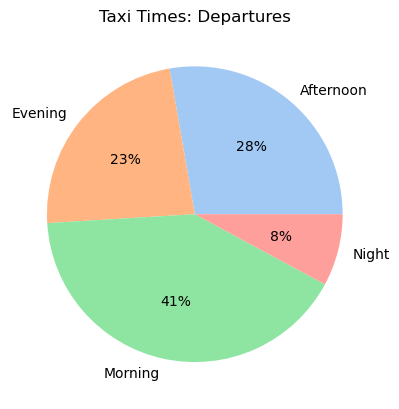

In [22]:
# DEPARTURE TAXI
#create pie chart
plt.title("Taxi Times: Departures")
plt.pie(data2, labels = labels2, colors = colors, autopct='%.0f%%')
plt.show()